Preamble: These are often considered the fundamentals of DSA
- Linked Lists 
- Stacks 
- Queues
- Trees 
- Graphs 
- Heaps
- Hash tables

This book is extremely introductory on all of these concepts, but doesn't cover heaps, trees, queues or stacks in any practical detail.

# Section 1

## Binary search (Algorithm)

In general, for any list of n, binary search will take **log2(n)** steps to run in the worst case, whereas simple search will take **n** steps. So if a phone book contains 128 entries **in order**, it will take a maximum of **log2(128) = 7 steps**. 

In [34]:
def search_iterative(list, item):
    # low and high keep track of which part of the list you'll search in.
    low = 0
    high = len(list) - 1

    # While you haven't narrowed it down to one element ...
    while low <= high:
        # ... check the middle element
        mid = (low + high) // 2
        guess = list[mid]
        
        # Found the item.
        if guess == item:
            return mid
        
        # The guess was too high.
        if guess > item:
            high = mid - 1
            
        # The guess was too low.
        else:
            low = mid + 1

    # Item doesn't exist
    return None

# item is the value in our list that we're looking for.

search_iterative([1, 3, 5, 7, 9], item=3) # we are looking for the number 3 in our list.

1

So we find the middle of the list then guess to see if the corresponding element is our item. If the guess is too low we raise the lower bound to be the middle of the list, and vice versa. Binary search runs in `O(logn)`.

## Big O notation

There are 5 common Big O runtimes.

* O(log n), also known as log time. Example: Binary search.
* O(n), also known as linear time. Example: Simple search.
* O(n * log n). Example: A fast sorting algorithm, like quicksort
* O(n2). Example: A slow sorting algorithm, like selection sort
* O(n!). Example: A really slow algorithm, like the traveling salesperson


# Section 2 

## How Memory Works, Arrays and Linked Lists

Picture 'memory' as a large checker box with an address for each box. If you want to store more than one item in memory, there are two ways of going about it - arrays and linked lists.

- Array: If you have a todo list, all tasks are stored contiguously (right next to each other) in memory. If there's only 4 adjacent addresses available and you have 5 items that you want to store, the computer will find a location with 5 addresses free, and will move all your items there. If you need more spaces and don't have it available, you'll have to move again. **Adding** more items to arrays is slow. Linked lists are the solution.

- Linked lists: Each item stores the address of the next item in the list. A bunch of random memory addresses are linked together. So, the 1st address gives the position of the 2nd address, and the 2nd address gives the position of the 3rd address and so on. **Adding** more items to linked lists is fast. You simply choose any random address, make note of it and then add your item. Then, give your previous address the location you just noted down.

So what are arrays good for? 

If you have a list of 10 items in a linked list and want to know the final one, you will have to go from 1 to 2 to 3 to ... 10. **Linked lists are bad if you're jumping around**.

With arrays, on the other hand, if you want the 5th item and you know the first address starts at 0x0000, then the 5th address is 0x0004. Arrays are great if you want to read random elements, because you can look up any element in your array instantly. Here are their runtimes:

<img src=attachment:de0ceaf4-f464-43fe-8e53-00c4f88b6896.png width=500 />
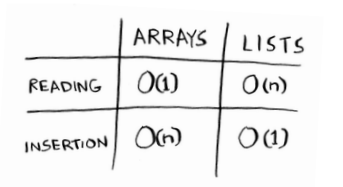

Note that because linked lists have read: O(n), if you intend on reading every element then O(n) is the fastest way of doing that. (This is because, if you want to read all n elements, then it must take at least n reads and therefore, O(n). It's only when doing random jumps that linked lists suffer the most with.

**Inserting to the middle of a list**

Doing this with linked lists is easy: You find the middle address (hard) and you redirect the previous address to point to your new middle item (easy). With an array, you need to shift all items down one slot. If you run out of space, you'll have to copy everything to a new location.

**Deleting a middle element of a list**

Exact same idea as above. Linked lists make it easy because you redirect the pointer. With arrays, you have to shift everything back one slot.

Here are the runtimes:

<img src=attachment:d722eaa3-edf5-4fd4-8342-6420c559c1aa.png width=500 />

It's worth mentioning that for the O(1) runtimes, we assume that we can instantly access the element. We know that in reality, for a linked list, we must iterate sequentially until we reach the element that we want to delete/insert into. **Since we normally insert or append, it is extremely useful to know the first address (to speed up inserting) and the last address (to speed up appending), therefore computers do this. This is why inserting is so fast with linked lists, we can safely assume that we know the last item in a linked list, so to append one item, all we've got to do is give the address of our appended item to our last item.**
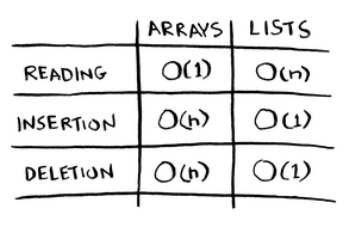

To summarise:

**Linked lists only allow sequential access**\
**Arrays allow random access** - we often say arrays have faster reads because they provide random access. Many data structures are implemented using arrays because of random access.

## Selection Sort (Sorting Algorithm)

Suppose you have a list of n artists and you want to sort them from highest to lowest play count. You could just find the highest in the list and move it to a new list and keep on repeating. To do this, you will have to read the *n* items in the list *n* times.

<img src=attachment:b7c0c2a2-2f5d-4680-8a20-646f42162a4d.png width=500 />
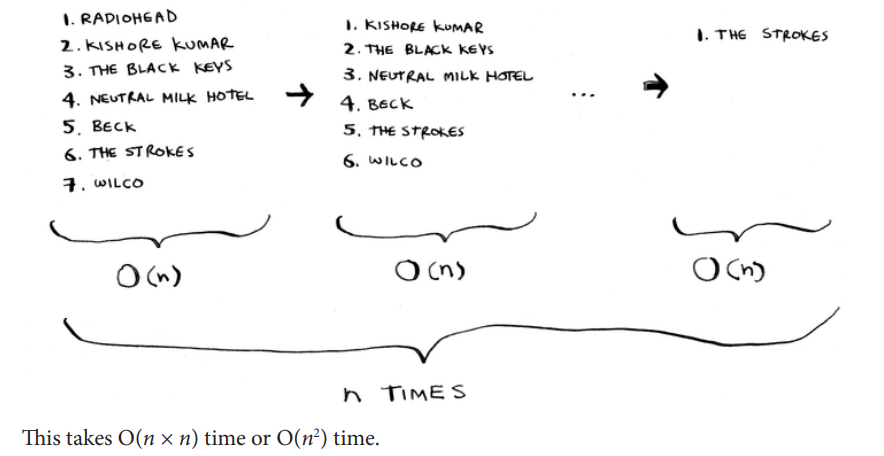

This takes O(n * n) = O(n^2) time. You might wonder why the runtime is not smaller given the fact that the list reduces in size after each read. On the first read, you read n items, then n-1 items, then n-2, all the way until 1 item remains. So, on average you read 1/2 * n items. This means that the runtime is actually O(n * 1/2 * n) but we can drop all constants so we return back to O(n^2) time.

Here's a python implementation for selection sort. We need a helper function.

In [11]:
def find_smallest_index(arr):
    smallest_value = arr[0]
    smallest_index = 0
    for i in range(len(arr)):
        if arr[i] < smallest_value:
            smallest_value = arr[i]
            smallest_index = i
    
    return smallest_index

def selection_sort(arr):
    
    new_arr = []
    
    for i in range(len(arr)):
        
        # arr.pop(smallest_value_index) removes that value from the array and also returns it so that we can store it in our new_arr.
        smallest_value_index = find_smallest_index(arr)
        new_arr.append(arr.pop(smallest_value_index)) #
                                                      
    return new_arr
                       
                    
arr = [3, 5, 6, 1, 2]
                       
selection_sort(arr)

[1, 2, 3, 5, 6]

It's useful to think of `.pop(some_array)` as 'remove and read'.

# Section 3

## Recursion

Recursion is when a function calls itself; all function calls go onto the call stack. A stack has two operations: push (add new item to stack) and pop (read item and remove).

# Section 4

## Quicksort

Divide and conquer (D&C) is a general, recursive technique for solving problems. Quicksort is one of the major D&C algorithms, thus quicksort is a subset of D&C.

**Let's first consider the general approach to D&C. Here's the two rules you must follow**

1. Figure out a simple case as the base case.
2. Figure out how to reduce your problem that takes you (closer) to the base case.

<img src=attachment:7fa3bcd7-8174-4da5-91a5-98a0f809eaec.png width=500 />

1. What could be the base case? The easiest would be if one side was an integer multiple of the other side. That way, we can divide it evenly into N squares.

2. For reducing the problem, we could mark out the biggest box that we can fit an integer amount of times. In the image below, we can only fit it twice.

<img src=attachment:42218bc7-ed27-4d01-90ea-2929b73327df.png width=500 />

With that remaining amount of land, we could apply the exact same rule: what's the largest box that we can fit an integer amount of times?

<img src=attachment:92062044-84b2-4619-b332-31ab63c32b7c.png width=500 />

We can apply this recursively until we reach the base case in which we have no remaining land after applying the algorithm. It turns out that 80m x 80m is the smallest size that fits into it. I also recognise that 80 is the greatest common divisor of 1680 and 640.
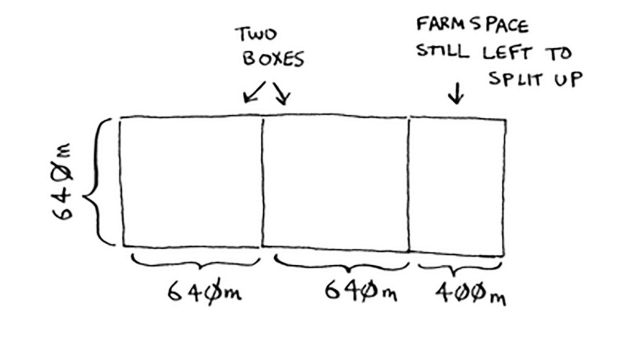
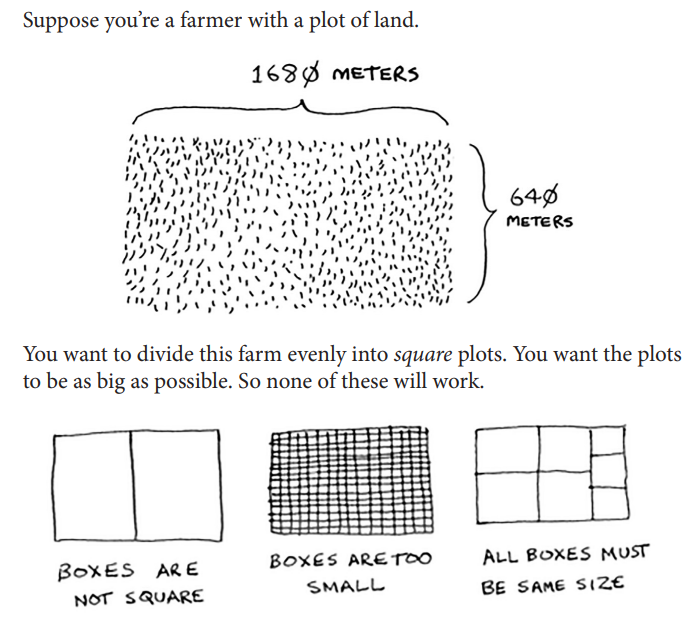
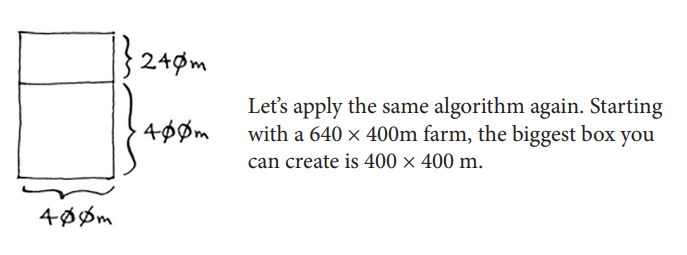

Exercise: Write out the code for the earlier sum function:

In [19]:
def d_and_c_sum(arr):
    if len(arr) == 0:
        return 0
    else:
        return arr.pop(0) + d_and_c_sum(arr)
    
d_and_c_sum([1,2,3,4,5])

15

Exercise: Write a recursive function to count the number of items in a list.

In [14]:
# My solution
def count_items(some_list):
    if list == []:
        return 0
    else:
        list.pop()
        return 1 + count_items(list)
    

count_items([1, 2, 3, 4, 5, 10, 12, 24, 35])

9

In [17]:
#Their solution

def count(some_list):
    if list == []:
        return 0
    return 1 + count(list[1:])

count_items([1, 2, 3, 4, 5, 10, 12, 24, 35])

9

Exercise: Find the maximum number in a list.

In [24]:
# My solution

def find_max(my_list):
    if len(my_list) == 2:
        a = my_list[0] 
        b = my_list[1]
        return a if a > b else b
    
    return my_list[0] if my_list[0] > (maximum := find_max(my_list[1:])) else maximum

find_max([5, 7, 3, 9, 2, 100, 3])

100

**Quicksort: Array with 3 or less items**

Quicksort (QS) uses D&C so we first need to think of the simplest case. An array with 1 or 0 items do not need to be sorted - we can just return the array. If it has 2 items, then to order them, we can consider switching the positions of the two items (e.g. from biggest to smallest). If we have 3 or more, we're going to need a **pivot**.

A **pivot** is an element of an array that we select (usually the first item). Then, we find elements smaller than the pivot and elements larger than the pivot. This is called **partitioning**.

Here's an example with 3 elements.

<img src=attachment:3571c9bc-1130-4a33-9807-c15e8e36cc88.png width=500 />

The consequence of **partitioning** is that we have:

- An (unsorted) sub-array of all the numbers less than the pivot 
- The pivot 
- An (unsorted) sub-array of all the numbers greater than the pivot

In the image above, QS knows how to sort an array with 2 items and an array with 0 items. If we can apply QS on both, the job would be done. This approach would work regardless of the pivot we choose.
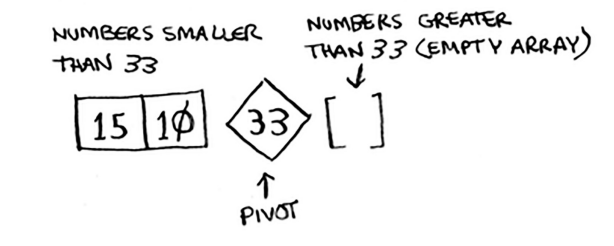

**Quicksort: Array with 4 or more items**

Firstly, we can choose 33 as the pivot. We can easily sort the RHS sub-array, but we'll need to use recursion on the LHS sub-array. It has 3 items so we need to choose a pivot for this sub array and apply QS. Now we know how to sort an array with 4 items. 

<img src=attachment:f8efdc38-af64-4980-8944-6b03cda890f8.png width=500 />

If we have an array 5 items, then depending on the pivot chosen, we can have a sub-array with a maximum length of 4 items - even if we choose the first/last element to be the pivot.

<img src=attachment:eb2678e6-23f4-46fc-ba6a-ab1a798d1c45.png width=500 />
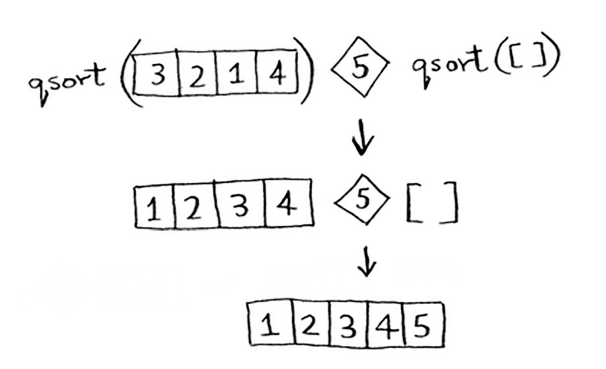
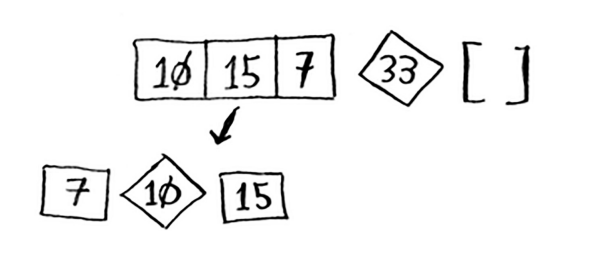

In [31]:
def quicksort(array):
    if len(array) < 2:
        return array # Base case: arrays with 0 or 1 element are already “sorted”.
    else:
        pivot = array[0] # Recursive case
        less = [i for i in array[1:] if i <= pivot] # Sub-array of all the elements less than the pivot

        greater = [i for i in array[1:] if i > pivot] # Sub-array of all the elements greater than the pivot

        return quicksort(less) + [pivot] + quicksort(greater)

print(quicksort([10, 5, 2, 3]))

[2, 3, 5, 10]


**Quicksort: Big O Notation**

QS is unique because its speed depends on the pivot you choose. 

- In the worst case, QS takes O(n^2) meaning it's as slow as selection sort.
- In the average case, QS takes O(nlogn) - this is the often quoted speed of QS.

One important thing to note about Big O Notation is that just because two sorting algorithms have the same time e.g. both O(nlogn), this doesn't necessarily imply that they take the same amount of time. This is because one full iteration of one algorithm may take longer than the other.

In reality, O(n) takes **c * n** where **c = some fixed amount of time that your algorithm takes.** It's called the constant. You can often neglect this constant because the functional form of big O usually dominates the constant. For example, simple search may only take 1ms per iteration while binary search may take 100 seconds, but simple search may require 1 billion iterations to complete while binary only requires 10 iterations.

Average vs worst case:
   
If we choose the first element as the pivot, we require 8 recursive calls -> Worst case: **stack size** = O(n).

<img src=attachment:f962edec-5a2b-4a81-9708-60fdc2131fa4.png width=500 />

Choosing the middle element reduces this down to 4 recursive calls -> Best case: **stack size** = O(logn).

<img src=attachment:152e1638-4bf9-4d41-80b2-0b2ec9827800.png width=500 />

Each level of the call stack requires that you touch O(n) elements, no matter how you partition the array. What does vary is how many levels are in the call stack.

So in the best case scenario, the number of levels in the call stack is O(logn) and each level takes O(n) time -> **O(n) * O(logn) = O(nlogn)**.

In the worst case scenario, the number of levels in the call stack is O(n) and each level takes O(n) time -> **O(n) * O(n) = O(n^2)**.

Unproven fact: The best case is also the average case. If you always choose a random element in the array as the pivot, quicksort will complete in O(n log n) time on average. Quicksort is one of the fastest sorting algorithms out there, and it’s a very good example of D&C.

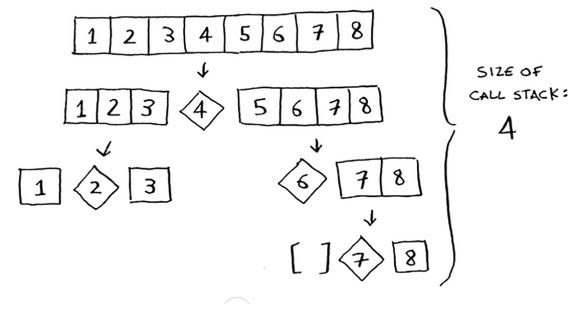
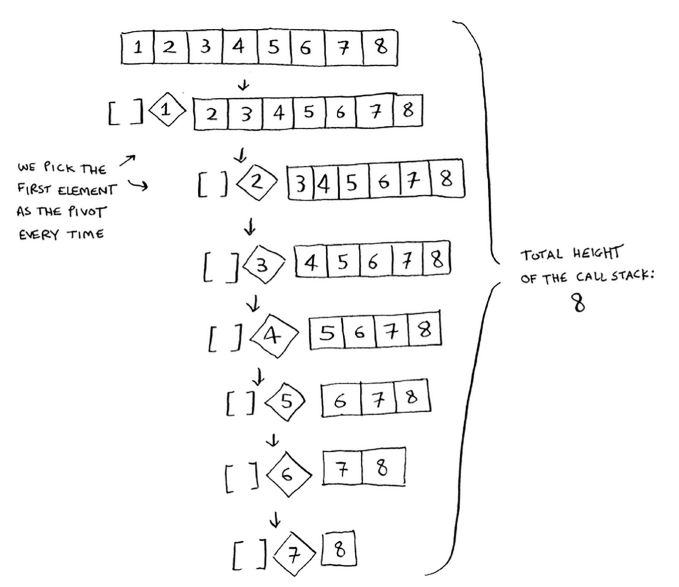

# Section 5

## Hash Tables/ Hash Maps

So far, we know 2 data structures: lists and arrays. The next structure is a hash table / hash map. But first, let's cover a hash function.

A **hash function maps strings to numbers**. By 'string', we refer to any kind of data - a sequence of bytes.

Let's say we want a register of grocery items (keys) and their prices (values). 

1. We start with an empty array with, say, 5 indices available (0 - 4)
2. We pass in the string 'Apple' to the hash function.
3. The hash function returns the index 3.
4. We store the price of an apple at this index.

We repeat this process until all grocery items are added to the array.

<img src=attachment:e6c9e33b-5bea-486b-88b5-7306d9ef55a4.png width=500 />

Now, whenever we want to find the price of an apple, we don't search the array. Instead, we feed 'Apple' to the hash function and it tells us the index 3 and we search that index to find the price. This computes in O(1) time always. Also, the hash function knows the size of the array so it will only return a valid index.

In summary,  you can use it the first time to find where to store the price of an apple, and then you can use it to find where you stored that price.

**Hash function + Array = Hash Table**

While lists and arrays map straight to memory, the hash table data structure has some hidden logic behind it which helps it figure out how to do it intelligently.

They’re also known as hash maps, maps, dictionaries, and associative arrays. And hash tables are fast! Remember our discussion of arrays and linked lists back in chapter 2? You can get an item from an array instantly (reading arrays takes O(1) time). And hash tables use an array to store the data, so they’re equally fast.

We know how to implement them in Python. Simply using `dict` or `{}`.

Hash tables are great when you want to:
- Create a mapping from one thing to another thing
- Look something up
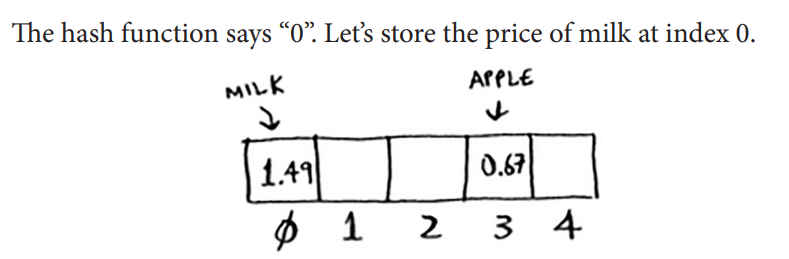

Checking for duplicates is convenient using hash tables too. We can use the property `.get` to see if a particular string has been added to the hash table. If it hasn't, `.get` returns `None`.

In [3]:
voters_list = {}

voters_list['Jim'] = True

print(voters_list.get('Jim'))
print(voters_list.get('Pam'))

True
None


**Using hash tables as a cache**

Instead of a website doing work every single time you make a request to the website's server, it can just cache (using hash maps) the most commonly used web pages. For example, the About Page, Contact Page, Home Page etc. So, when you make a request, it first checks to see if that url e.g. facebook.com/About is in the hash table. If not, then the server does some work.

To recap, hashes are good for: 
- Modeling relationships from one thing to another thing
- Filtering out duplicates
- Caching/memorizing data instead of making your server do work

## Collisions 

In reality, it's almost impossible to map different keys to different values. If we have a simple hash function that maps strings to an index based on alphabetical order, and we have a small array, we may get two keys assigned to the same value. This is known as a **collision**. For example, we assign the price of 'Apples' which takes index 0, the price of 'Bananas' which takes index 1, but then we try to assign the price of 'Avocados'. Both the 'Apples' and 'Avocados' keys will point to the same index 0. 

One solution is to start a linked list: 

<img src=attachment:32b4b272-1cf2-464a-ac46-726af009d0d0.png width=500 />

If this linked list is small, it won't take much time to search through the words beginning with 'A', especially if you've got a good hash function. Ideally, our hash function would map keys evenly over the hash.
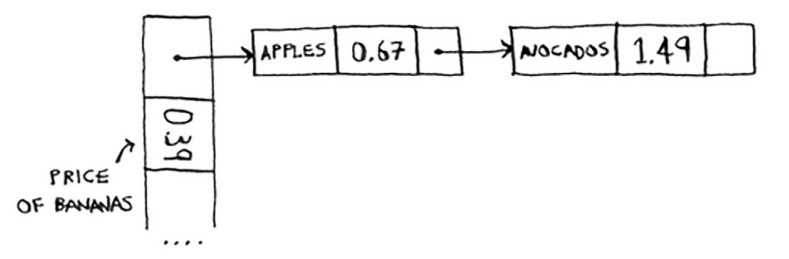

## Performance

This is the performance table of a hash map. In the average case it takes O(1) which means constant time. This means that it takes the same amount of time regardless of how large the hash table is.

<img src=attachment:323c7ac1-52b3-49d8-b328-d1999334d242.png width=500 />

The worst case is reached if you constantly experience collisions. There are two things needed to avoid collisions:

- A low load factor
- A good hash function

(The following information isn't necessary - it's a peak under the hood. You won't be implementing hash tables from scratch, but I'll write a quick summary.)

<img src=attachment:119843bd-d195-4eae-a720-a9d951e7aecc.png width=500 />

If the load factor increases past 0.7, you'll create a new array generally double the size of the old array and insert all the old items into the new array.

A good hash function that's typically used is SHA (secure hash algorithm). Normally, we've seen hash functions take a string and convert to an array index. SHA however, takes a string and converts it into another string.

This is useful for checking passwords. When you type in your password, Google, for example, hashes it and checks it against the hash in its database. If Google gets hacked, they only have access to the hashed password. Since SHA is one-way, then cannot retrieve the original password.
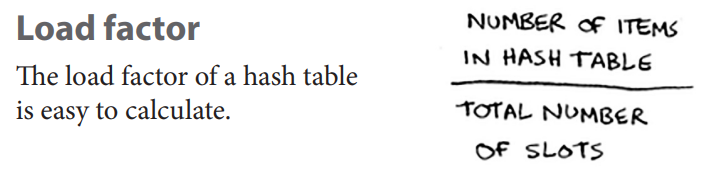
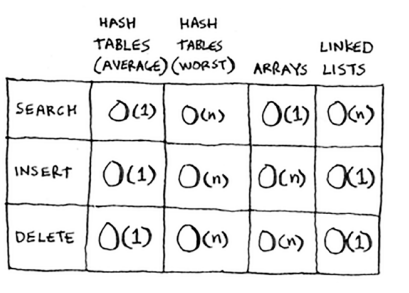

# Section 6

## Breadth-first search (BFS)

The algorithm to solve a shortest-path problem is called breadth-first search. This short path could be the smallest number of mobes to checkmate in a game of chess.

BFS generally helps answer two types of questions:

1. Is there a path from node A to node B?
2. What is the shortest path from node A to node B?

An example of number 1 could be seeing if you can find someone who sells mangoes. First you see if any of your friends sells mangoes and if not, you see if any of their friends sells mangoes, and so on. This is still a BFS algorithm.

An example of number 2 could be trying to find the closest mango seller. Intuitively, we should search all first-degree connections before radiating outwards (i.e. 'breadth') to friends of friends (2nd degree). The corollary of this approach is that it answers both questions 1 and 2.

One important thing is order; when checking our 1st degree contacts, it's important that we add the 2nd degree contacts to the search list **after** all the 1st degree contacts have been searched. Otherwise, we won't get an optimal solution. There's a data structure that deals with this called a **queue**.

## Queue

Queues are similar to stacks. You can’t access random elements in the queue. Instead, there are two only operations, enqueue and dequeue.

- Enqueue: Add an item to a queue. aka `push`
- Dequeue: Take an item off a queue. `pop`

The queue data structure is called a FIFO data structure: First In, First Out. In contrast, a stack is a LIFO data structure: Last in, First Out.

## Code implementation

How do we express a node connection in code, i.e. an A -> B mapping. We've seen this structure before: **Hash tables**. Since it's one-way, we call this a **directed graph**.

In [27]:
graph = {}
graph["you"] = ["alice", "bob", "claire", "Phillip"]
graph["alice"] = ["peggy", "zack", "Chip"]
graph["bob"] = [] # No contacts

Here's the implmentation of the queue:

<img src=attachment:56c7f8fa-b5c4-4371-9ee7-79b0c396dcd6.png width=500 />
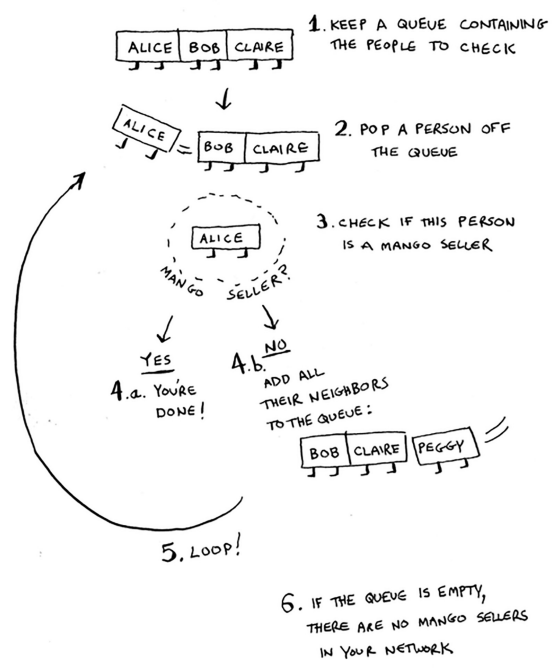

In [29]:
from collections import deque

graph = {}

# 1st degree
graph["you"] = ["alice", "bob", "claire", "phillip"]  

# 2nd degree
graph["alice"] = ["contact of alice: zack", "contact of alice: chip"]
graph["bob"] = ["contact of bob: john", "contact of bob: tripp"] # No contacts
graph["claire"] = [] # No contacts
graph["phillip"] = [] # No contacts

# 3rd degree

graph['zack'] = []
graph['chip'] = []

# graph['john'] = []
# graph['tripp'] = []



def person_is_seller(name):
    return name[-1] == 'p' # arbitrary rule for demonstration purposes.

def bfs():
    
    search_queue = deque() # creates a new queue
    search_queue += graph["you"] # the RHS simply returns all your neigbours to the search queue. So, we add them to the search queue.
    searched = [] # if two people have a mutual friend, we don't want to add them twice to our queue so we create a list of all those searched.
    
    while search_queue:
    
        # grab the first person off the queue.
        # popleft() is a property of deque which is faster than doing .pop(0).
        person = search_queue.popleft() 
        print(f'Checking to see if {person} is a mango seller')
        
        if person not in searched:
    
            if person_is_seller(person):
                print(f'{person} is a mango seller; we can return here to quit our function if we like.\n')
    
            else:
                print('Nope!')
            
                # if they're not, add all of this person's friends to our queue.
                # if this person has no friends, 'get' would return None, but you can't add 'None' to a list via concatenation.
                # So, we setup a default return of `[]`. This can be concantenated to the search_queue list.
                search_queue += graph.get(person, []) 


bfs()

Checking to see if alice is a mango seller
Nope!
Checking to see if bob is a mango seller
Nope!
Checking to see if claire is a mango seller
Nope!
Checking to see if phillip is a mango seller
phillip is a mango seller; we can return here to quit our function if we like.

Checking to see if contact of alice: zack is a mango seller
Nope!
Checking to see if contact of alice: chip is a mango seller
contact of alice: chip is a mango seller; we can return here to quit our function if we like.

Checking to see if contact of bob: john is a mango seller
Nope!
Checking to see if contact of bob: tripp is a mango seller
contact of bob: tripp is a mango seller; we can return here to quit our function if we like.



Quick note about above code: 

John and Trip are 3rd degree contacts without any contacts for themselves, but we can't enqueue 'nothing' or 'None' to our list.\
Strictly, we could add an empty list to their list of contacts: `graph['john'] = []`, but we can bypass this issue by adding a default return of `[]` to `.get`.

The runtime of searching using BFS will be at least O(n) where n is the number of connections. But we also need to perform inserts into a queue. Since it takes O(1) to add a single person to our queue, it will take O(number of people) to add everyone to our queue. 

In total we have O(V+E) where V is the number of vertices (people) and E is the number of edges (connections).

Asides:

- For graphs, if our connections represent dependencies e.g. Exercise <- shower <- get dressed, then this is called a **topological sort**.

- A **tree** is a special type of graph where no edges ever point up to a higher node, therefore, trees contain no loops.

# Section 7

## Dijkstra's Algorithm

There are 4 steps to Dijkstra's algorithm:

1. Find the “cheapest” node. This is the node you can get to in the least amount of time.
2. Update the costs of the neighbors of this node.
3. Repeat until you’ve done this for every node in the graph.
4. Calculate the final path.

Step 1: Find the cheapest node. In this case, it's node B.

<img src=attachment:f61fd869-8e34-4ad9-8155-1e3f6f9b0a42.png width=200 />

Step 2: Calculate how long it takes to get to each of node B's neighbours **by going through B**. We see that it only takes 5 minutes to get to A and 7 minutes to get to the finish. **This is an important step; we are essentially trying to find a cheaper way to reach that particular node, thereby obsoleting all other ways.**

<img src=attachment:94677637-a07c-448b-9d41-032779282634.png width=400 />

Step 3: Update the costs so write somewhere that 'A' takes 5 minutes (instead of 6) and finish takes 7 (instead of infinity).

Now, repeat this entire process for the next chepeast node.

Step 4 (step 1 repeated):  Now A is the next cheapest node.

Step 5 (step 2 repeated): A's only neighbour is the finish line .

<img src=attachment:213691b7-c3d6-40ca-a4db-961c0d7a8a8a.png width=300 />

Step 6 (step 3 repeated): Update costs for finish line from 7 to 6.

Note that we repeat this for every node except the final (finish) node. This is **not** BFS because BFS can only be used on unweighted graphs - it only considers the number of nodes. Also note that Dijkstra only works on directed acyclic graphs (DAGs). This means that there cannot be any loops or double-sided arrows.


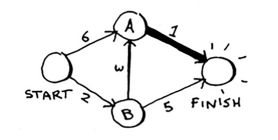
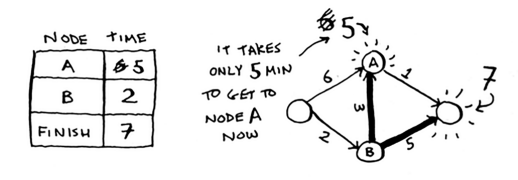
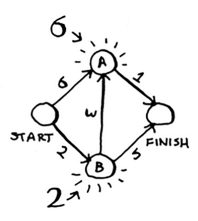

There's another example in the full notes in which you're trying to trade a book to get a piano for the least amount.

<img src=attachment:20ad64e0-3c1f-46c7-95bd-1545c872fb34.png width=500 />

It's useful to add the 'parent' column so that you know how you got that low cost value.
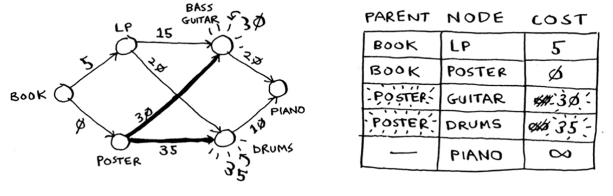

Note that Dijkstra's algorithm breaks if you have negative weights. The solution for a negative-weighted graph is another algorithm called **Bellman-Ford algorithm**, but it's out the scope of this book/summary.

## Dijkstra's Algorithm - Code Implementation

To implement this in code, we'll need 3 hashmaps. One for all the pairings in the graph (that won't be mutated), one for the costs (that will be updated) and one for the parents (that is also updated).

<img src=attachment:102944de-ef8f-4595-aad7-0abdceb31594.png width=500 />
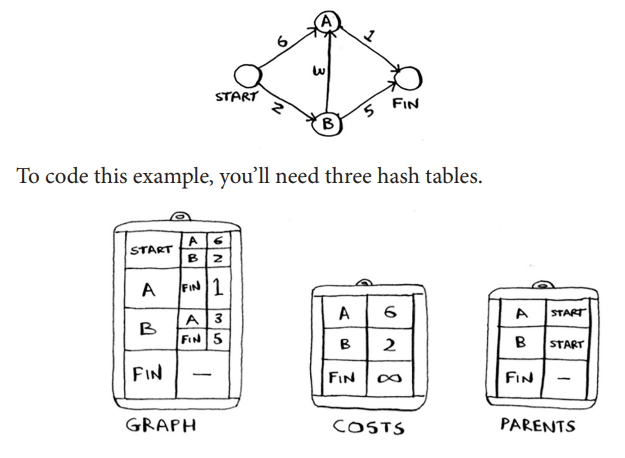

For the graph hashmap, we can represent the weights to **A** and **B** like so:

In [12]:
graph = {}

graph['start'] = {}
graph['start']['a'] = 6
graph['start']['b'] = 2

graph

{'start': {'a': 6, 'b': 2}}

Now the remaining nodes. The diagram version is:

<img src=attachment:192bc7aa-d5cd-4ab8-aa0d-40a6b6feb943.png width=250 />
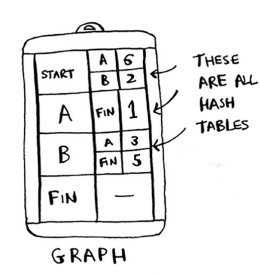

In [13]:
graph['a'] = {}
graph['a']['finish'] = 1

graph['b'] = {}
graph['b']['finish'] = 5
graph['b']['a'] = 3

graph['finish'] = {}

The cost of a node is how long it takes to get to that node from the start. Here’s the code to make the costs table:

<img src=attachment:d7c48ad6-0179-4039-91fe-1a89e1a491fb.png width=250 />
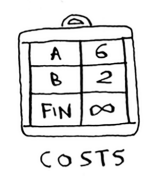

In [22]:
infinity = float('inf') #this creates the actual python-recognised infinity value

costs = {}
costs['a'] = 6
costs['b'] = 2
costs['finish'] = infinity

Finally, the parents hashtable.

<img src=attachment:4d123601-6d1b-4817-ad21-ac0a5fb3b6cf.png width=250 />
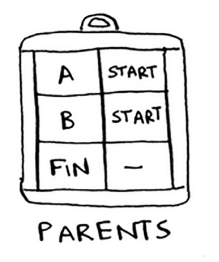

In [23]:
parents = {}
parents['a'] = 'start'
parents['b'] = 'start'
parents['finish'] = None

Finally, you need an array to keep track of all the nodes you’ve already processed, because you don’t need to process a node more than once. We choose an array because we can iterate through it.

In [24]:
processed = []

<img src=attachment:dba2ce2c-172b-4b03-8645-6d17f0c37dcb.png width=350 />
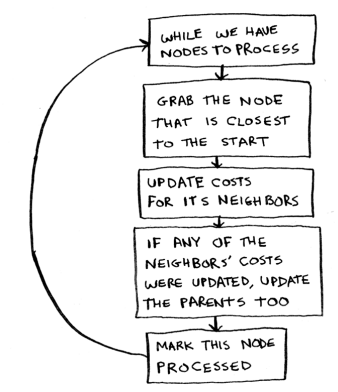

In [25]:
def find_lowest_cost_node(costs):
    lowest_cost = float('inf')
    lowest_cost_node = None
    
    for node in costs: # Go through each node.
        cost = costs[node]
        
        if cost < lowest_cost and node not in processed:
            lowest_cost = cost # … set it as the new lowest-cost node.
            lowest_cost_node = node
            
    return lowest_cost_node

node = find_lowest_cost_node(costs) # Find the lowest-cost node that you haven’t processed yet.

In [26]:
while node is not None: # If you’ve processed all the nodes, this while loop is done.
    cost = costs[node] 
    neighbors = graph[node]
     
    for n in neighbors.keys(): # Go through all the neighbors of this node.
        new_cost = cost + neighbors[n] # If it’s cheaper to get to this neighbor 
        
        if costs[n] > new_cost: # by going through this node …
            costs[n] = new_cost # … update the cost for this node.
            parents[n] = node # This node becomes the new parent for this neighbor
         
    processed.append(node) # Mark the node as processed.
    node = find_lowest_cost_node(costs) # Find the next node to process, and loop.

In [31]:
print(costs) # the cost to finish is only 6.
print(parents) # this is the path

{'a': 5, 'b': 2, 'finish': 6}
{'a': 'b', 'b': 'start', 'finish': 'a'}


As you can see, 'finish's parent is 'a', 'a's parent is 'b' and 'b's parent is 'start'. So, 'start' > 'b' > 'a' > 'finish'

# Section 8 

## Greedy Algorithms/Strategy

Here you'll tackle the problems that have no fast algorithmic solution (NP-complete problems), and how to identify such problems.

Imagine you have a list of choices for the classes you can take at a school. You want to take as many classes as possible but since some of them overlap, you won't be able to take them all. We can use the greedy algorithm: 

A greedy algorithm is simple: at each step, pick the optimal move. In this case, each time you pick a class, you pick the class that ends the soonest. In technical terms: at each step you pick the locally optimal solution. Then, you pick the next class that starts after the first class but ends the soonest. Keep on repeating and in the end you’re left with the globally optimal solution. Believe it or not, this simple algorithm finds the optimal solution to this scheduling problem!

These algorithms don't always work.

Here's another example: If you're a thief with a 20kg bag in a shop with items of various values - in what order do you take the items? 
The solution is the intuitive one: Take the most expensive thing without worrying about its weight (locally optimal), then take the next most expensive item. Keep going until you run out of space. 

You certainly won't get the most optimal solution but it works *pretty well* and is easy to code.

## Set-covering problem 

This is a scenario where the greedy strategy is absolutely necessary.

Suppose you’re starting a radio show. You want to reach listeners in all 50 states. You have to decide what stations to play on to reach all those listeners. It costs money to be on each station, so you’re trying to minimize the number of stations you play on. You have a list of stations.

Each station covers a region, and there’s overlap. How do you figure out the smallest set of stations you can play on to cover all 50 states? Sounds easy, doesn’t it? Turns out it’s extremely hard. Here’s how to do it:

<img src=attachment:bdea59f8-a12a-4e00-ba75-d19feabd6f85.png width=200 /> <img src=attachment:4a5890a9-9c30-47ca-9b5d-c8fbc70c9e0f.png width=200 />

1. List every possible subset of stations. There are 2^n possible subsets. 

If you have 3 stations, you have 8 subsets:\
{},\
{A}, {B}, {C},\
{AB}, {AC}, {BC},\
{ABC}

This is called the **power set** and the power set of x = {ABC} is the set of all subsets of x including x itself and the empty set. Putting all above subsets into one big set is called the power set of {ABC}.

2. Now from all these subsets, pcik the set with the smallest number of stations that covers all 50 states.

That's it, but because  2^n stations, it takes O(2^n) time which is very slow.
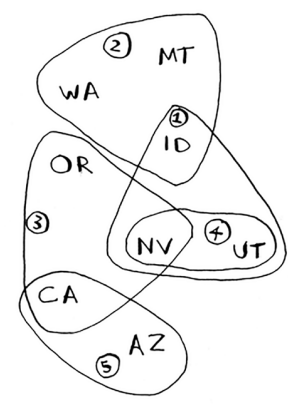
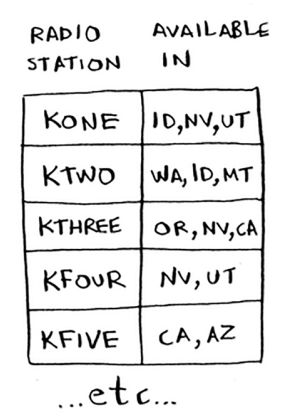

Now with the greedy approach:

1. Start with all states uncovered. Pick the station that covers the most states. 
2. Repeat until all the states are covered. It’s OK if a station covers some states that have been covered already.

This is an approximation algorithm. It runs in O(n^2) as opposed to O(2^n) where n is the number of radio stations.

Now in code. Note that we use a set so that we don't have repeats.

In [14]:
states_needed = set(['mt', 'wa', 'or', 'id', 'nv', 'ut', 'ca', 'az'])

Now we can use a hash set to map each radio station to the states that it covers.

In [24]:
stations = {}
stations['kone'] = set(['id', 'nv', 'ut'])
stations['ktwo'] = set(['wa', 'id', 'mt'])
stations['kthree'] = set(['or', 'nv', 'ca'])
stations['kfour'] = set(['nv', 'ut'])
stations['kfive'] = set(['ca', 'az'])

final_stations = set() # To hold the answer of the final set of stations.

In [25]:
best_station = None
states_covered = set() # a set of all the states this station covers that haven’t been covered yet

for station, states_covered_by_station in stations.items(): # loop over all stations to see which is the best station.

    covered = states_needed & states_covered_by_station # & is the intersection of these two sets.
    
    if len(covered) > len(states_covered): # if the size of the set for this particular station in the loop is greater than the size of the best station.. 
        best_station = station # update.
        states_covered = covered
        
final_stations.add(best_station) 
print(best_station) # We've found the state that covers the most states. Now we've got to remove these states from states_needed and run the loop again.

states_needed = states_needed - states_covered 

None


The last line is a *set difference*. If A = {1, 2, 3} and B = {3, 5}, then A - B = {1, 2}. It is the same as 'A and not B'.  

Now we'll present the full code for this algorithm.

In [26]:
states_needed = set(['mt', 'wa', 'or', 'id', 'nv', 'ut', 'ca', 'az'])

stations = {}
stations['kone'] = set(['id', 'nv', 'ut'])
stations['ktwo'] = set(['wa', 'id', 'mt'])
stations['kthree'] = set(['or', 'nv', 'ca'])
stations['kfour'] = set(['nv', 'ut'])
stations['kfive'] = set(['ca', 'az'])

final_stations = set() # we cannot use final_stations = {} because Python creates a dictionary, not a set. And dictionaries don't have '.add' methods.

while states_needed:
    best_station = None
    states_covered = set()
    
    for station, states in stations.items():
        covered = states_needed & states
        
        if len(covered) > len(states_covered):
            best_station = station
            states_covered = covered
            
    states_needed -= states_covered
    final_stations.add(best_station)

print(final_stations)

{'kthree', 'ktwo', 'kone', 'kfive'}


Quicksort is *not* a greedy algorithm but breadth-first search (BFS) and Dijkstra's Algorithm *are* greedy algorihthms.

## NP Complete problems

**Travelling Salesman**

Consider the possible routes for a salesman going to a number of cities. Assume all routes are directed i.e. going A -> B is a different route to going B -> A, and also assume that you can start at any one of the cities. This is the factorial function. 

<img src=attachment:61c3e0a2-4f6f-45de-b783-e659a10aba9a.png width=500 />

This problem and the set-covering problem both have something in common: you must calculate every possible solution and pick the smallest one. Both of these problems are NP-complete (non-deterministic polynomial-time complete).
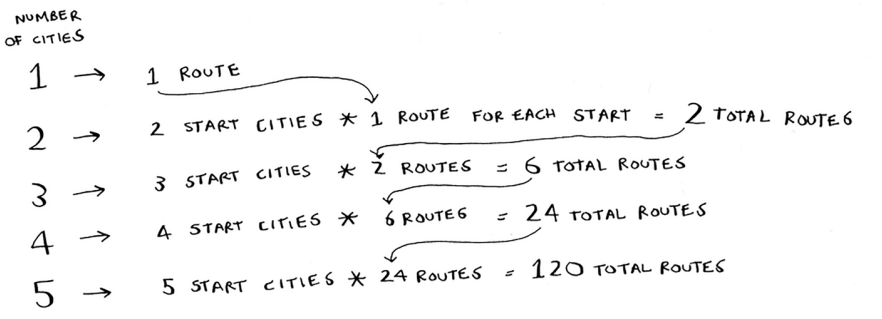

**How do you tell if a problem is NP-complete?**

Here are some giveaways:

- Your algorithm runs quickly with a handful of items but really slows down with more items.
- “All combinations of X” usually point to an NP-complete problem.
- Do you have to calculate “every possible version” of X because you can’t break it down into smaller sub-problems? Might be NP-complete.
- If your problem involves a sequence (such as a sequence of cities, like traveling salesperson), and it’s hard to solve, it might be NP-complete.
- If your problem involves a set (like a set of radio stations) and it’s hard to solve, it might be NP-complete.
- Can you restate your problem as the set-covering problem or the traveling-salesperson problem? Then your problem is definitely NP-complete.

**Recap**

- Greedy algorithms optimize locally, hoping to end up with a global optimum.
- NP-complete problems have no known fast solution.
- If you have an NP-complete problem, your best bet is to use an approximation algorithm.
- Greedy algorithms are easy to write and fast to run, so they make good approximation algorithms.

# Section 9 

## Dynamic Programming

### Knapsack Problem

This is a technique to solve a hard problem by breaking it up into subproblems and solving those subproblems first. Unlike greedy algorithms, it will find the optimal solutions.

Let's say we have a knapsack that can carry 4lb of goods

<img src=attachment:edbbe823-e49a-419a-872c-65081eb6358b.png width=400 />

We're trying to maximise the value of the knapsack. 
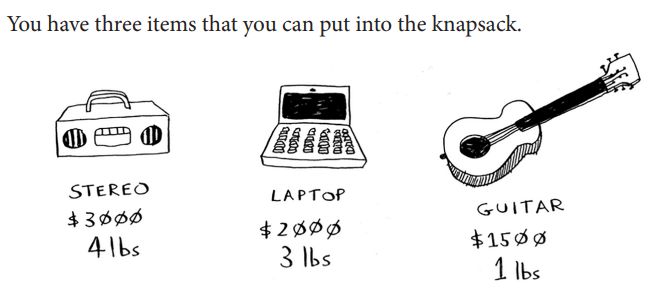

In dynamic programming, we try to solve the problem for sub-knapsacks and then work up to solving the original problem.

<img src=attachment:7c4ce87a-54d9-4b76-8fa2-bb8bb107048f.png width=400 />
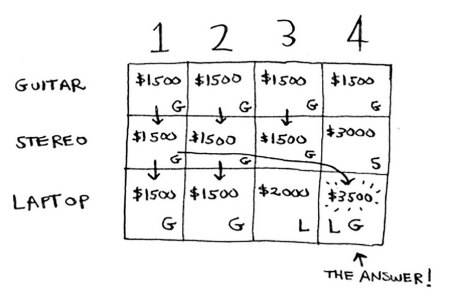

Above is a grid that we can create to visualise the problem. I'll explain it via this grid and then how we can calculate each value in the grid using one formula only.

- Each i'th row represents the item of value and each j'th column represents the size of the knapsack in lb. 
- We start by filling in each row from left to right and then top to bottom, eventually reaching the original problem in the bottom right corner.
- Thus, each row represents the current best guess for this maximum, e.g. row 3 is *always* more up-to-date than row 2.

Approach:

1. Starting with the guitar row (i = 1), we ask ourselves, what is the most amount of value we can fit in 1 lb (j = 1) with a choice from the list: [guitar]?
2. Of course, since the guitar is the only choice we have and it fits in all knapsacks ranging from 1 - 4 lb, we write the value and the item in each box.
3. On the stereo row (i = 2), what is the most amount of value we can fit in 1 lb (j = 1) with a choice from the list: [stereo, guitar]?
4. Since the stereo weighs 4 lb, we can only consider it for knapsacks that can carry 4 lb or more. In sub-knapsacks weighing less, we default to the guitar row solution.
5. At (stereo, 4lb) i.e. (i=2, j=4), we ask ourselves, is the value in the row *directly* above higher than the value of the stereo? Since the stereo is \\$3000, we choose it.
6. For the final row (i = 3), what is the most amount of value we can fit in 1 lb (j = 1) with a choice from the list: [laptop, stereo, guitar]?
7. Since the laptop and stereo weigh 3 lb or more, the first two columns must use the default value of the column directly above.
8. For (i=3, j=3), we need to make another value comparison: is \\$1500 from the *directly* above column higher than the value of the item of the current row, i.e., the laptop?
9. The laptop has a higher value of \\$2000 so we choose it.
10. For the final cell (i=3, j=4), we make the same comparison: is the previous value in the *directly above* column higher than the value of the current row's item, i.e., the laptop?
11. The laptop doesn't cost more than the stereo (\\$3000 vs \\$2000), but the laptop leaves 1 lb of free space which has an associated value. We can determine that value right from our value table.
12. Go to the last *completed* row and find the value associated with the remaining space. It is 1 lb so go to column 1 and read off the \\$1500 value.
13. To state the final comparison: \\$3000 stereo from the row above, or, \\$3500 from the value of current row's item + value of remaining 1 lb?

This entire approach can be substituted by the formula:

<img src=attachment:e2077dbe-e87f-4917-af19-28c6a8aaba49.png width=600 />

Note that where it says 'value of the remaining space' is equivalent to cell: [ i - 1 ][ j - item's weight ], it means, taking i=3 and j=4 and item's weight being 3 lb as an example, we get [ 3 - 1 ][ 4 (lb) - 3 (lb) ] = [2, 1].
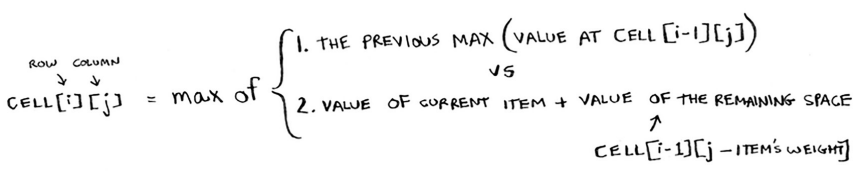

Final notes: 
- You can change the order of the rows, but only the order of the iterations will change and hence, the final answer will remain the same.
- You shouldn't fill in the grid column-wise - it may work sometimes like for this knapsack problem, but not always.
- If you are given information of a new item that you can steal, you simply add a row below the final and work through it. You don't have to recalculate everything. This is the power of dynamic programming.
- What if you add an item of a smaller weight e.g. 0.5 lb? Since our table only accounts for integer lbs, we must add in extra columns at 0.5, 1.5, 2.5, 3.5 lbs etc. to account for the finer granularity.
- You can't account for fractions of items, e.g. x amount of gold for x amount of value, using dynamic programming. But you can use a greedy algorithm instead to get a fast non-optimal solution. Simply take as much as you can of the most valuable item.
- Dynamic programming only works when each subproblem is discrete — when it doesn’t depend on other subproblems. So for example, if you had an itinerary to go to France which takes 1 day to go there and see the sights, each of which take 0.5 days, then each activity takes 1.5 days. You can't consider the fact that once you're in paris, you no longer need to consider the 1 day travel to paris for each activity.

### Travel Itinerary Problem

Firstly, it can be useful to generalise the concepts a little knowing what we now know. From the last example, we saw items and their values. It can be useful to think of the items as 'costs' and the prices of those items as 'values'. In this example, we will suppose that you’re going to London for a nice vacation. You have two days there and a lot of things you want to do. You can’t do everything, so you make a list.

<img src=attachment:6b6bb13d-776a-4cc8-bb13-b76a38d98c70.png width=400 />
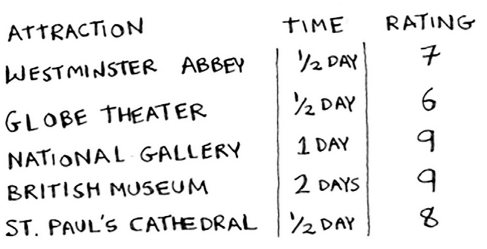

Here's the solution:

<img src=attachment:5681cbeb-b1b7-497e-8ef3-af89a20f4b1f.png width=400 />
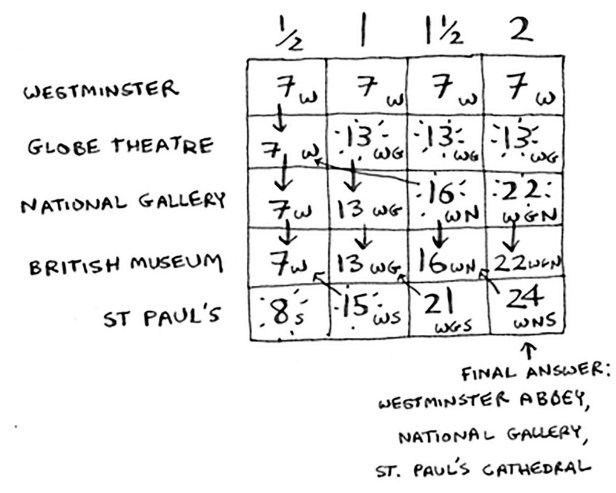

### Longest common substring problem

Suppose you run dictionary.com. Someone types in a word, and you give them the definition. But if someone misspells a word, you want to be able to guess what word they meant. Alex is searching for fish, but he accidentally put in hish. That’s not a word in your dictionary, but you have a list of words that are similar.

Similar to 'hish':
- fish 
- vista

There isn't a systematic way to figure out the axes, values, and costs of the grid. But using what we know, we can start experimenting:

- First, we could compare 'hish' to 'fish' and find the longest common substring. Then, repeate for 'hish' and 'vista'.
- Create grids for each and see which one contains the highest value.

Because we know the final answer, we can just fill in the grid and then generalise/ determine the rules after.

<img src=attachment:4ece1233-b912-4c1f-aceb-2010026d0dcf.png width=250 />

And here's the formula annotated: 

<img src=attachment:bde05308-a6ae-4daa-b19d-5cb99a15f4ec.png width=400 />
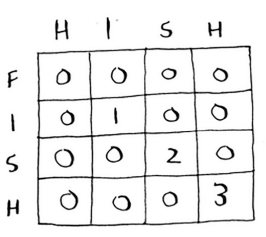
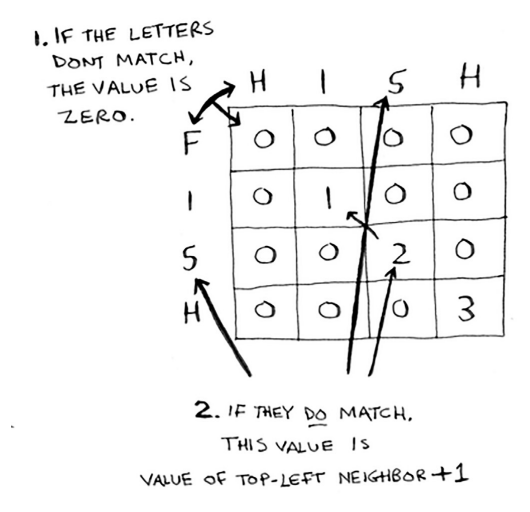

Here's the grid for 'hish' and 'vista':

<img src=attachment:a306e8fc-141c-4ca3-a85a-e718f6faed52.png width=300 />
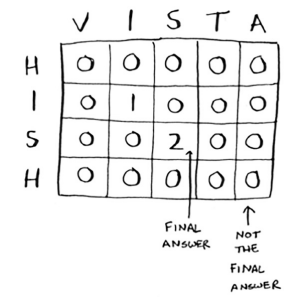

We can see issues with this approach. If we instead typed 'fosh' and we had to pick out of 'fish' and 'fort', this approach values both options as 2, but clearly 'fish' is closer to 'fosh'. So, we need the *longest common subsequence* instead of *longest common substring*.

<img src=attachment:8f604e3e-3e42-44d4-bcb1-81945537fbc0.png width=300 />

By 'pick the larger', they mean compare with the cell directly to the left and the cell directly above.
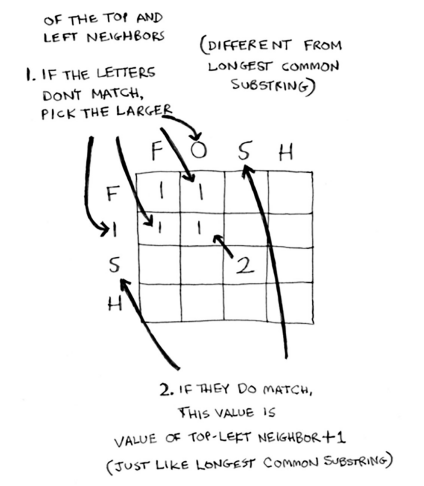

Takeaways and tips:

- Dynamic programming is useful when you’re trying to optimizesomething given a constraint. In the knapsack problem, you had to maximize the value of the goods you stole, constrained by the size of the knapsack. Dynamic programming is useful when you’re trying to optimize something given a constraint. In the knapsack problem, you had to maximize the value of the goods you stole, constrained by the size of the knapsack. 

- You can use dynamic programming when the problem can be broken into discrete subproblems, and they don’t depend on each other.

- Every dynamic-programming solution involves a grid.

- The values in the cells are usually what you’re trying to optimize. For the knapsack problem, the values were the value of the goods.

- Each cell is a subproblem, so think about how you can divide your problem into subproblems. That will help you figure out what the axes are.

Dynamic programming is used in a bunch of scenarios:

- Biologists use the longest common subsequence to find similarities in DNA strands. They can use this to tell how similar two animals or two diseases are. The longest common subsequence is being used to find a cure for multiple sclerosis.

- Have you ever used diff (like git diff)? Diff tells you the differences between two files, and it uses dynamic programming to do so.

- We talked about string similarity. Levenshtein distance measures how similar two strings are, and it uses dynamic programming. Levenshtein distance is used for everything from spell-check to figuring out whether a user is uploading copyrighted data. 

- Have you ever used an app that does word wrap, like Microsoft Word? How does it figure out where to wrap so that the line length stays consistent? Dynamic programming!

# Section 10